<IPython.core.display.Javascript object>


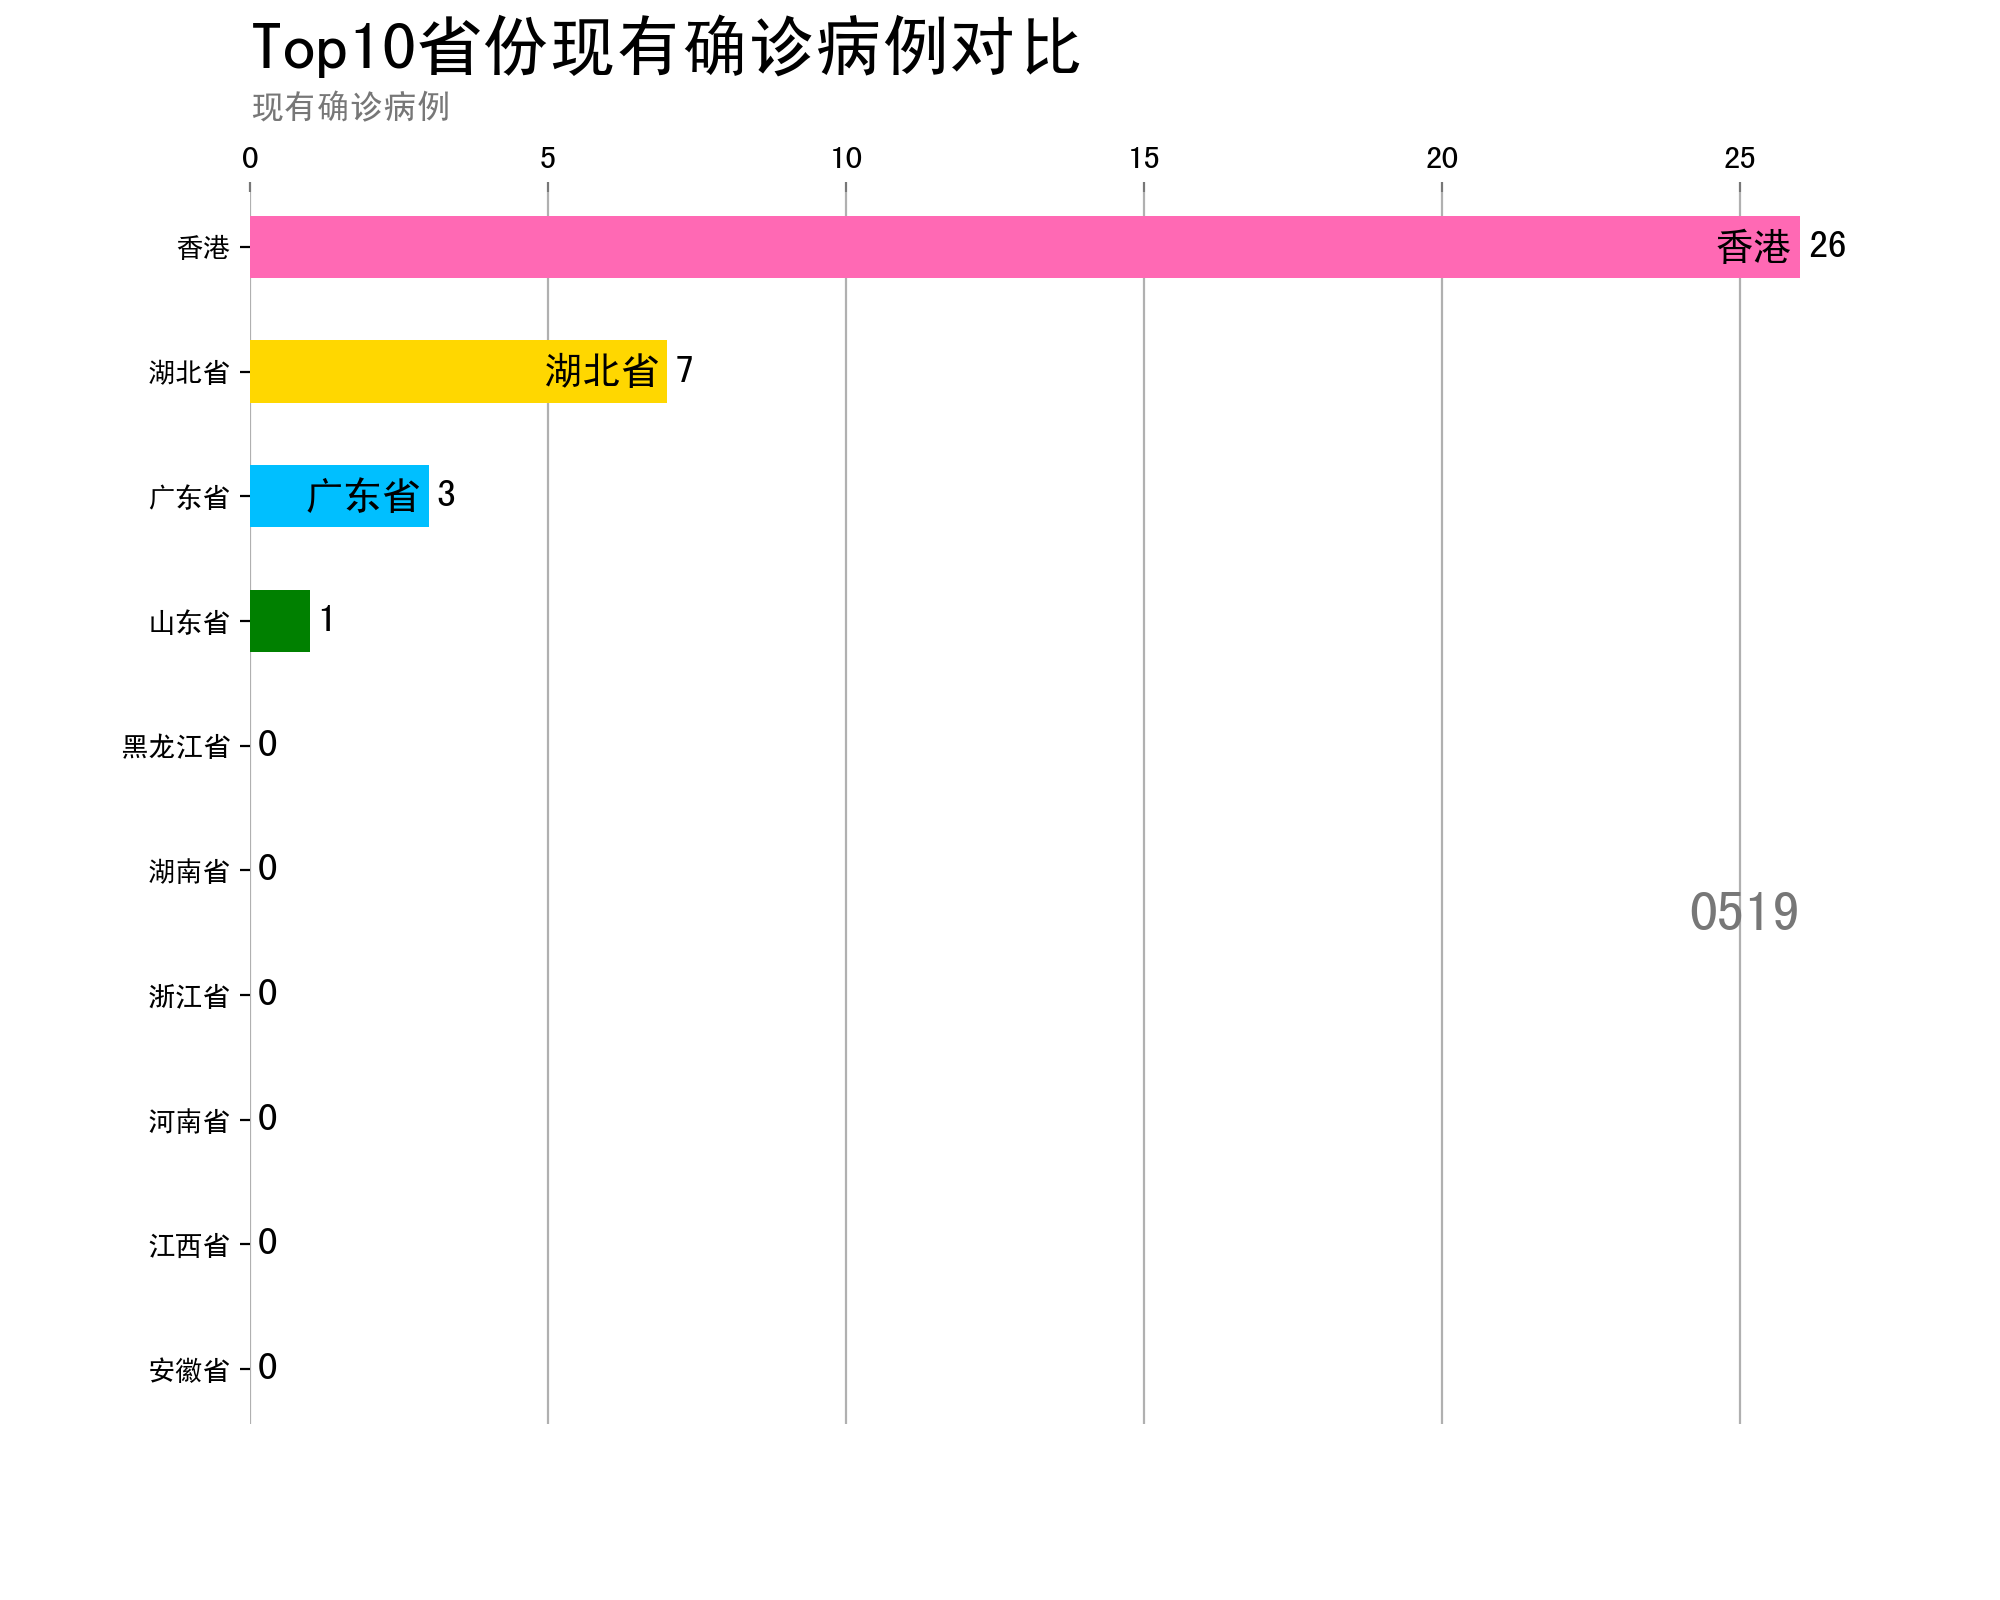

In [4]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1. 数据准备
# 1.1 加载中国各省疫情数据
datas = pd.read_json('../data/corona_virus_of_china.json')
# 1.2 筛选出当天累计确诊的前十的省份的数据
# 获取最近一天的疫情数据
max_date = datas['dateId'].max()
# 按累计确诊排名
tmp_data = datas[datas['dateId'] == max_date].sort_values(by='confirmedCount', ascending=False)
# 获取累计确诊前十的省份的名字
top_10_province_names = tmp_data.iloc[:10].provinceName.values
# print(top_10_province_names)
# 获取top10省份的疫情数据
top_10_data = datas[datas.provinceName.isin(top_10_province_names)]

# 统计从1月23号以来前10省份的现有确诊人数
final_data = top_10_data.pivot_table(values='currentConfirmedCount', index='dateId', columns='provinceName')
final_data.fillna(0, inplace=True)

# # 1.3 省份颜色字典, 相同省份, 使用相同的数据条
colors = ['r', 'g', 'deepskyblue', 'm', 'c', 'yellow', 'gold', 'lime', 'hotpink', 'orange']
color_map = dict(zip(final_data.columns, colors))
# print(color_map)
# print(final_data)

# 创建绘制条形图的画布与坐标
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制条形图
def draw_barchart(day):
    # 清空坐标系
    ax.clear()
    # 准备绘制数据
    day_data = final_data.loc[day].sort_values()
    # 生成每一个国家对应的条形的图的颜色
    color = [color_map[name] for name in day_data.index]
    # 绘制条形图
    ax.barh(day_data.index, day_data.values, height=0.5, color=color)
    # 使用当天展示数据最大值除以200, 作为调整文本位置依据
    dx = day_data.values.max() / 200
    # 遍历国家及其疫情数据
    for i, (name, value) in enumerate(zip(day_data.index, day_data.values)):
        # 条形图偏离坐标轴10dx, 才在条形图上加入国家名称
        if value / dx > 20:
            ax.text(value - dx, i, name, size=14, weight=600, ha='right', va='center')
        # 设置条形图头上的疫情数字
        ax.text(value + dx, i, f'{value:,.0f}', size=14, ha='left', va='center')

    # 显示日期
    ax.text(1, 0.4, str(day)[4:], transform=ax.transAxes, size=20, weight=800, ha='right', color='#777777')
    # 设置标题
    ax.text(0, 1.06, '现有确诊病例', transform=ax.transAxes, size=12, color='#777777')
    ax.text(0, 1.10, 'Top10省份现有确诊病例对比', transform=ax.transAxes, size=24, weight=600)
    # 设置x轴刻度的位置在顶部
    ax.xaxis.set_ticks_position('top')
    # 设置标签字体
    ax.tick_params(axis='x', color='#777777', labelsize=12)
    # 设置图形
    ax.margins(0, 0.02)
    # 设置网格
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    plt.box(False)
    plt.show()

# 添加动画
animation = animation.FuncAnimation(fig, draw_barchart, frames=final_data.index.values, repeat=False);
plt.show()


In [2]:
animation.save('Top10省份现有确诊病例对比.mp4', fps=5)